#Importing all the required Libraries

In [12]:
import numpy as np
import pandas as pd
from kNN.simple_KNN import simpleKNN
from sklearn.metrics import accuracy_score #only to check accuracy for the first time with a defined k value
import matplotlib.pyplot as plt
import math

#Read The Iris Dataset

In [13]:
# for google colab 
# ========>>========>>=========>>========>>
# from google.colab import drive
# drive.mount('/content/drive')
# pima = pd.read_csv('/content/drive/MyDrive/4_1/ML/lab1/data/iris.csv')
# ==========>>=========>>===========>>==========>>


#for local
# fileName = str(input("Enter File Name: "))
fileName = "iris.csv"
data = pd.read_csv("../data\\"+fileName)
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


#Getting all the column names

In [14]:
column_names = []
for i in data.columns:
    column_names.append(i)

#Visualizing the effects of various features on output

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0


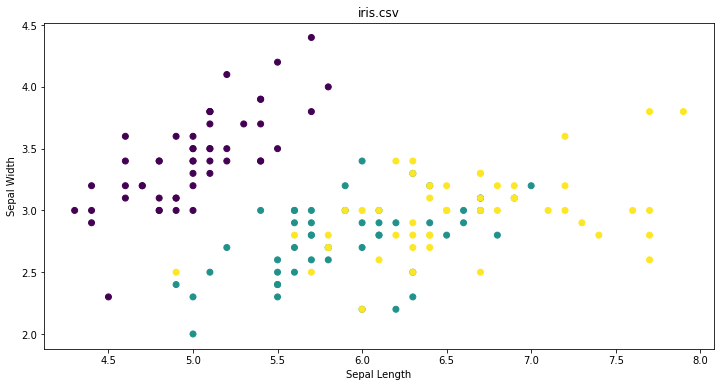

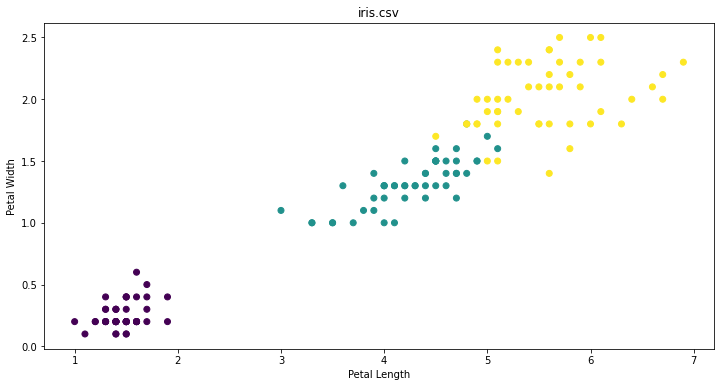

In [15]:
for i in range(data.shape[0]):
    if data.iloc[i][data.shape[1]-1]=="Setosa":
        data.iloc[i,data.shape[1]-1]=0
    elif data.iloc[i][data.shape[1]-1]=="Versicolor":
        data.iloc[i,data.shape[1]-1]=1
    else :
        data.iloc[i,data.shape[1]-1]=2
print(data.head())
plt.figure(figsize=(12,6))
plt.title(fileName)
plt.scatter(data.iloc[:,0], data.iloc[:,1], c=data.iloc[:, data.shape[1]-1])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()
plt.figure(figsize=(12,6))
plt.title(fileName)
plt.scatter(data.iloc[:,2], data.iloc[:,3], c=data.iloc[:, data.shape[1]-1])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

#Randomly Splitting out dataset into training data and test data depending on split ratio

In [16]:
import random
pd.options.mode.chained_assignment = None 
trainSet = pd.DataFrame(columns=column_names[0:len(column_names)])
testSet = pd.DataFrame(columns=column_names[0:len(column_names)])
def  loadDataSet(data, split, train, test):
    
    for i in range(data.shape[0]):
        for j in range(data.shape[1]-1):
            data.loc[i][j]=float(data.loc[i][j])
        if random.random()<split:
            train.loc[train.shape[0]] = data.iloc[i].values
        else:
            test.loc[test.shape[0]] = data.iloc[i].values
loadDataSet(data, .8, trainSet, testSet)
print(trainSet.shape)
print(testSet.shape)

(121, 5)
(29, 5)


#Separating TrainFeatures from TrainTargets and TestFeatures from TestTargets

In [17]:
trainFeatures = trainSet.iloc[:,0:trainSet.shape[1]-1]
trainTargets = trainSet.iloc[:, trainSet.shape[1]-1:trainSet.shape[1]]
testFeatures = testSet.iloc[:, 0:testSet.shape[1]-1]
testTargets = testSet.iloc[:, testSet.shape[1]-1:testSet.shape[1]]

#Applying implemented kNN algorithm

In [18]:
kn = simpleKNN(k_neighbors=3)
kn.fit(trainFeatures, trainTargets)
prediction = kn.predict(testFeatures)


#Testing the accuracy of the implemented algorithm

In [19]:
testTargetList = testTargets['variety'].tolist()
print(prediction)
print(testTargetList)
print("Accuracy: ", accuracy_score(testTargetList,prediction))


[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Accuracy:  0.9310344827586207


#Storing error percentage for different k value from 1 to 50

In [20]:
error = []
for i in range(1,50):
    kn = simpleKNN(k_neighbors=i)
    kn.fit(trainFeatures, trainTargets)
    prediction = kn.predict(testFeatures)
    testTargetList = testTargets['variety'].tolist()
    prediction = np.array(prediction)
    testTargetList = np.array(testTargetList)
    error.append(np.mean(prediction!=testTargetList))
    # print("Accuracy: ", accuracy_score(prediction, testTargetList))
    print("error percentage:",np.mean(prediction!=testTargetList)*100,"% \tNumber of Error: ",int(np.mean(prediction!=testTargetList)*len(testTargetList)))

error percentage: 6.896551724137931 % 	Number of Error:  2
error percentage: 6.896551724137931 % 	Number of Error:  2
error percentage: 6.896551724137931 % 	Number of Error:  2
error percentage: 6.896551724137931 % 	Number of Error:  2
error percentage: 3.4482758620689653 % 	Number of Error:  1
error percentage: 0.0 % 	Number of Error:  0
error percentage: 0.0 % 	Number of Error:  0
error percentage: 0.0 % 	Number of Error:  0
error percentage: 3.4482758620689653 % 	Number of Error:  1
error percentage: 0.0 % 	Number of Error:  0
error percentage: 0.0 % 	Number of Error:  0
error percentage: 0.0 % 	Number of Error:  0
error percentage: 3.4482758620689653 % 	Number of Error:  1
error percentage: 3.4482758620689653 % 	Number of Error:  1
error percentage: 3.4482758620689653 % 	Number of Error:  1
error percentage: 3.4482758620689653 % 	Number of Error:  1
error percentage: 3.4482758620689653 % 	Number of Error:  1
error percentage: 3.4482758620689653 % 	Number of Error:  1
error percenta

#Plotting Mean Error vs k-value

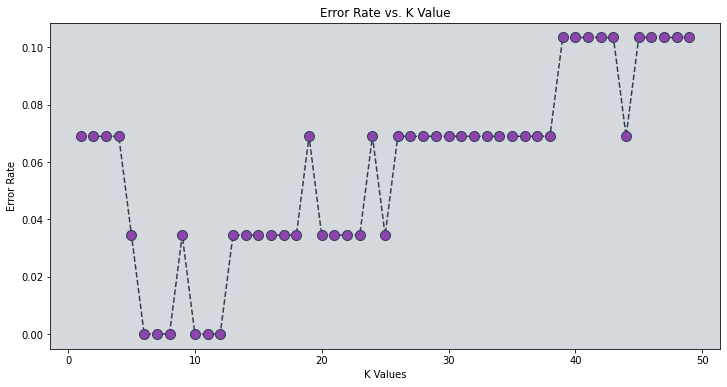

In [21]:
plt.figure(figsize=(12, 6))


ax=plt.axes()
ax.set(facecolor="#D5D8DC")
plt.plot(
    range(1, 50), 
    error, 
    color='#2E4053',
    linestyle='dashed', 
    marker='o', 
    markerfacecolor='#8E44AD', 
    markersize=10
)
plt.title('Error Rate vs. K Value')
plt.xlabel('K Values')
plt.ylabel('Error Rate')
plt.show()

#Finding the best value of k for our data which is for minimum error

In [22]:
print("The best K value ", np.argmin(error)+1, "The minimum error value is :", min(error),"\n(If multiple first one is taken)")

The best K value  6 The minimum error value is : 0.0 
(If multiple first one is taken)
